In [1]:
# import data
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [136]:
wine=pd.read_csv(r"C:\Users\Dell\Desktop\MACHINE LEARNING\Practices\Wine.csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


# EDA

In [137]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [138]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

<Axes: >

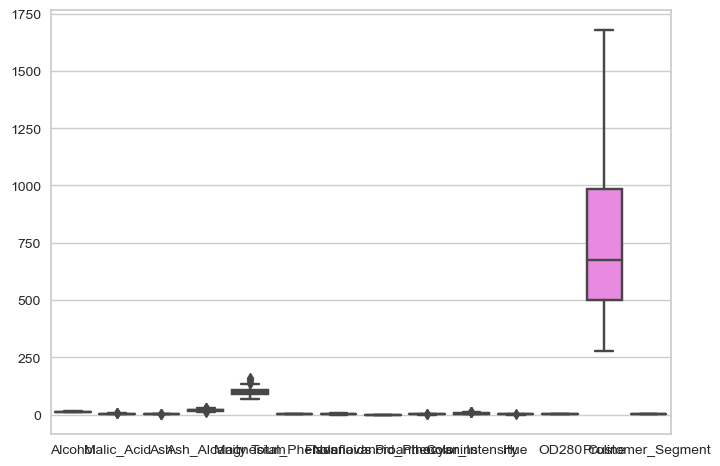

In [139]:
# checking for outliers
sns.boxplot(data=wine)

In [140]:
# Treatment for outliers
for i in wine:
    if wine[i].dtype in ("float64","int64"):
        q1=wine[i].quantile(0.25)
        q3=wine[i].quantile(0.75)
        iqr=q3-q1
        ul=q3 + 1.5 * iqr
        ll=q1 - 1.5 * iqr
        wine[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

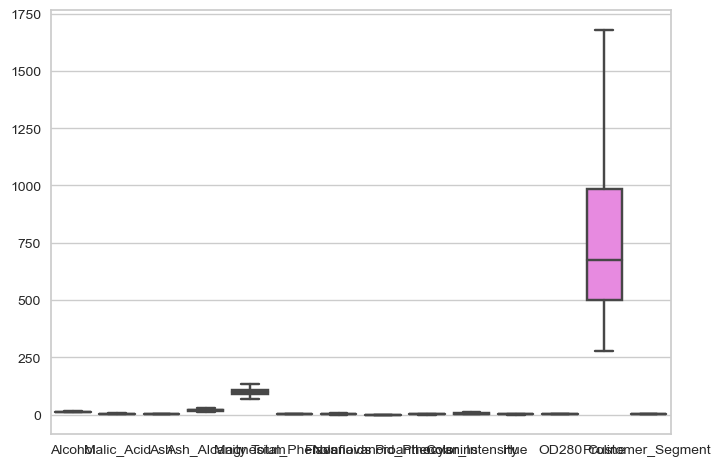

In [141]:
sns.boxplot(data=wine)

# Q-1

In [142]:
Correlation = wine.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720,-0.328222
Malic_Acid,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173,0.440422
Ash,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676,-0.047680
Ash_Alcanity,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700,0.525608
Magnesium,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557,-0.224264
Total_Phenols,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385,0.489109
Proanthocyanins,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562,-0.512528
Color_Intensity,0.549107,0.264897,0.256799,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.032693,1.000000,-0.520416,-0.430638,0.327100,0.260260


<Axes: >

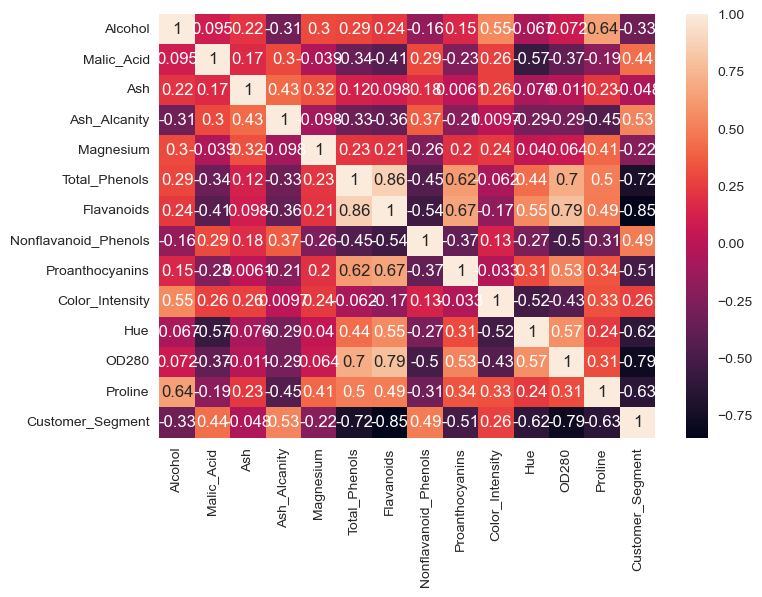

In [143]:
sns.heatmap(wine.corr(),annot=True)

Total_Phenols,Flavanoids,OD280,Proline have high correlation.

In [144]:
#Take specific Variable for Analysis
data=wine.iloc[:,[5,6,11,12]].values #Total_Phenols,Flavanoids,OD280,Proline
data[0:5]

array([[   2.8 ,    3.06,    3.92, 1065.  ],
       [   2.65,    2.76,    3.4 , 1050.  ],
       [   2.8 ,    3.24,    3.17, 1185.  ],
       [   3.85,    3.49,    3.45, 1480.  ],
       [   2.8 ,    2.69,    2.93,  735.  ]])

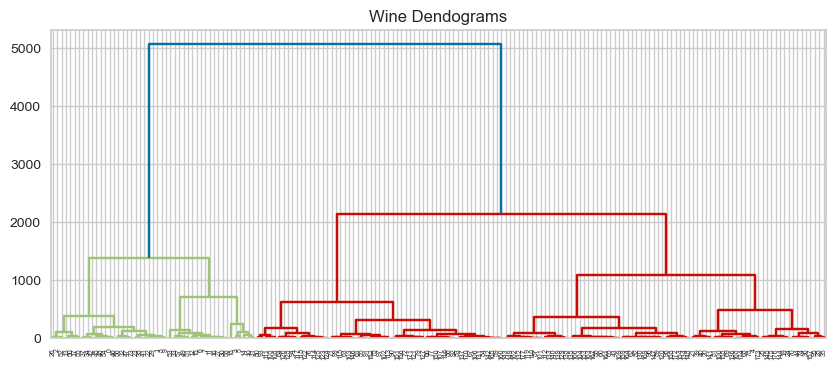

In [145]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 4))
plt.title("Wine Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward',metric='euclidean')) #ward = minimum of variance

<Axes: xlabel='Total_Phenols', ylabel='Proline'>

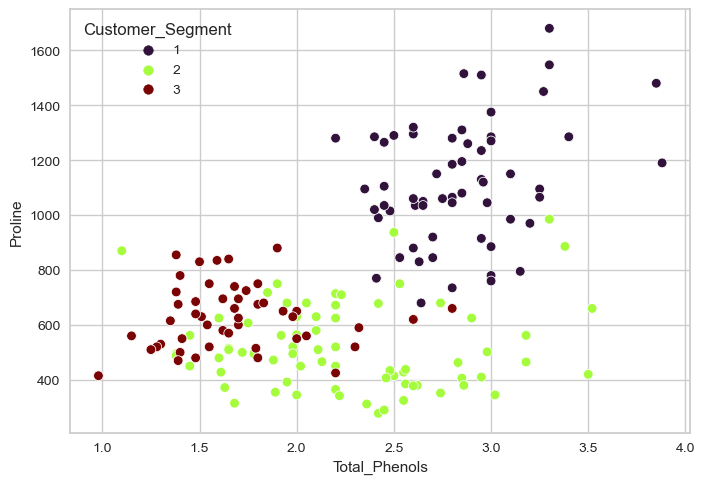

In [147]:
import seaborn as sns 
sns.scatterplot(x='Total_Phenols',y='Proline',hue='Customer_Segment',palette="turbo",data=wine)

# Q-2

In [148]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

# Taking specific column for Analysis¶

In [149]:
numeric_predictors = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
X_train = wine[numeric_predictors]
y_train = wine['Customer_Segment']

In [150]:
X_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [151]:
Correlation = X_train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic_Acid,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Ash_Alcanity,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Total_Phenols,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562
Color_Intensity,0.549107,0.264897,0.256799,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.032693,1.000000,-0.520416,-0.430638,0.327100


* PCA is effected by scale so we need to scale the features in the data before applying PCA.
* we can transform the data onto unit scale (mean = 0 and variance = 1)

In [152]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
  
X_train_1 = sc.fit_transform(wine) 

In [154]:
X_train_1

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.42894777,
        -0.59516041,  1.37386437]])

# No. of variable in original dataset

In [27]:
from sklearn.decomposition import PCA 
  
model = PCA(n_components = 3) # we are specifying we want 3 PCA
  
principalComponents= model.fit(X_train_1) # Fit the model with X and apply the dimensionality reduction on X.

# Explained Variance

In [155]:
import numpy as np
list(np.round(principalComponents.explained_variance_,2))   # eigen values  >= 1 

[5.6, 2.56, 1.43]

In [156]:
np.round(5.6/13,2)

0.43

In [157]:
list(np.round(principalComponents.explained_variance_ratio_,2))    # >= 50%

[0.4, 0.18, 0.1]

In [158]:
0.4+0.18+0.1

0.68

You can see that the first principal component contains 40% of the variance

The second principal component contains 18% of the variance & third PC contain 10%.

Together, the three components contain 68% of the information.

In [159]:
X_train_1

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.42894777,
        -0.59516041,  1.37386437]])

* Beta Values or Eigen Vector Z1 = Beta1x1+Beta2X2 + beta3X3 + ..... + beta13X13

In [160]:
principalComponents.components_ 

array([[-0.1377818 ,  0.22329763, -0.0009843 ,  0.22883621, -0.1251569 ,
        -0.3582432 , -0.38964643,  0.2657193 , -0.28231773,  0.08669661,
        -0.27694181, -0.34904433, -0.26933504,  0.39251008],
       [-0.47689882, -0.22541809, -0.31850888,  0.01538238, -0.32622521,
        -0.06153297,  0.0046166 , -0.02489123, -0.03214222, -0.52494506,
         0.27227014,  0.16469922, -0.36240539, -0.00496269],
       [-0.2019702 ,  0.08624025,  0.62967078,  0.60797016,  0.13384644,
         0.14846374,  0.14788287,  0.17454208,  0.1418448 , -0.15115795,
         0.08845697,  0.16545227, -0.12315971, -0.00556301]])

z1=(-0.1377818 * 1.51861254) + (0.22329763 * -0.56553422) +.......+( 0.39251008*-1.21394365) z1

In [161]:
#Renaming the Columns Prediction for data to get data reduction

X_train_1

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [162]:
transformed_data = principalComponents.fit_transform(X_train_1)  ### only give data which is transformed ( principal component)
transformed_data

array([[-3.56196816e+00, -1.52896694e+00, -1.30557584e-01],
       [-2.54433006e+00,  3.29992583e-01, -2.04160282e+00],
       [-2.80654586e+00, -1.04222492e+00,  1.01679147e+00],
       [-3.94428663e+00, -2.79326448e+00, -1.54955554e-01],
       [-1.41586551e+00, -9.53430360e-01,  2.11709262e+00],
       [-3.31467737e+00, -2.15987637e+00, -6.03447682e-01],
       [-2.76883800e+00, -1.16001791e+00, -9.57417877e-01],
       [-2.40349271e+00, -1.69343430e+00,  2.13923950e-01],
       [-2.81956282e+00, -8.88750972e-01, -1.77911470e+00],
       [-3.01921539e+00, -7.80940913e-01, -1.00228232e+00],
       [-3.70084217e+00, -1.30750101e+00, -4.11422652e-01],
       [-2.11892156e+00, -5.94496720e-01, -1.17784148e+00],
       [-2.44752356e+00, -6.43424399e-01, -8.56288036e-01],
       [-3.71609766e+00, -1.08602601e+00, -1.19849473e+00],
       [-4.48843580e+00, -2.09514172e+00, -1.26924638e+00],
       [-2.62175728e+00, -1.73411029e+00,  2.69678242e-01],
       [-2.49498019e+00, -2.40231306e+00

In [163]:
print("original shape:   ", X_train_1.shape)
print("transformed shape:", transformed_data.shape)

original shape:    (178, 14)
transformed shape: (178, 3)


In [164]:
principalDf = pd.DataFrame(data = transformed_data
             , columns = ['Data PC1', 'Data PC2', 'Data PC3'])
principalDf.head()

,Data PC1,Data PC2,Data PC3
0,-3.561968,-1.528967,-0.130558
1,-2.544330,0.329993,-2.041603
2,-2.806546,-1.042225,1.016791
3,-3.944287,-2.793264,-0.154956
4,-1.415866,-0.953430,2.117093


# Identify variable is combining together in Which PCA

In [165]:
numeric_predictors_1=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
scaled_train=pd.DataFrame(X_train,columns=numeric_predictors_1)
scaled_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [166]:
final_data = pd.concat([scaled_train,principalDf],axis=1)
final_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Data PC1,Data PC2,Data PC3
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-3.561968,-1.528967,-0.130558
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-2.544330,0.329993,-2.041603
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-2.806546,-1.042225,1.016791
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-3.944287,-2.793264,-0.154956
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1.415866,-0.953430,2.117093


In [167]:
Correlation_Matrix=pd.DataFrame(round(final_data.corr(),3))*100
Correlation_Matrix=abs(Correlation_Matrix.iloc[0:13,13:16])
Correlation_Matrix.style.applymap(lambda x: 'background-color : yellow' if x > 50 else '')

,Data PC1,Data PC2,Data PC3
Alcohol,32.500000,76.100000,24.100000
Malic_Acid,52.700000,36.000000,10.300000
Ash,0.200000,50.900000,75.000000
Ash_Alcanity,54.000000,2.500000,72.400000
Magnesium,29.500000,52.100000,15.900000
Total_Phenols,84.600000,9.800000,17.700000
Flavanoids,92.000000,0.700000,17.600000
Nonflavanoid_Phenols,62.700000,4.000000,20.800000
Proanthocyanins,66.600000,5.100000,16.900000
Color_Intensity,20.500000,83.800000,18.000000


Data PC1 = Malic_Acid,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Hue,OD280,Proline

Data PC2 = Alcohol,Magnesium,Color_Intensity

Data PC3 = Ash,Ash_Alcanity

In [168]:
train = pd.concat([principalDf,y_train],axis=1)
train

,Data PC1,Data PC2,Data PC3,Customer_Segment
0,-3.561968,-1.528967,-0.130558,1
1,-2.544330,0.329993,-2.041603,1
2,-2.806546,-1.042225,1.016791,1
3,-3.944287,-2.793264,-0.154956,1
4,-1.415866,-0.953430,2.117093,1
...,...,...,...,...
173,3.575821,-2.165115,-0.378914,3
174,2.951568,-1.793183,0.210665,3
175,3.019601,-2.860911,-0.975719,3
176,2.739308,-2.390595,-0.562449,3


# Q :3
Build a Decision Tree Classifier as dataset contains more than 2 values in Customer_Segment comment about its accuracy.



In [169]:
wine.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [171]:
dt=train
dt

,Data PC1,Data PC2,Data PC3,Customer_Segment
0,-3.561968,-1.528967,-0.130558,1
1,-2.544330,0.329993,-2.041603,1
2,-2.806546,-1.042225,1.016791,1
3,-3.944287,-2.793264,-0.154956,1
4,-1.415866,-0.953430,2.117093,1
...,...,...,...,...
173,3.575821,-2.165115,-0.378914,3
174,2.951568,-1.793183,0.210665,3
175,3.019601,-2.860911,-0.975719,3
176,2.739308,-2.390595,-0.562449,3


In [172]:
from sklearn.model_selection import train_test_split

x = dt.drop(["Customer_Segment"],axis=1)
y = dt[["Customer_Segment"]]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=231)

In [173]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,Customer_Segment,Data PC1,Data PC2,Data PC3
50,1,-3.450534,-0.131976,-2.039342
109,2,-1.418961,1.462938,1.815816
141,3,2.646097,-0.364124,-0.981187
108,2,-0.040610,2.354541,-0.505442
43,1,-0.904882,-0.342410,-0.198481


In [178]:
test = pd.concat([y_test,X_test],axis=1)
test.head()

,Customer_Segment,Data PC1,Data PC2,Data PC3
115,2,-0.324053,3.809609,1.313594
86,2,0.769887,2.255458,0.790085
151,3,2.928557,-2.104990,-0.338029
42,1,-3.315787,-1.170049,-0.285485
17,1,-2.240096,-1.690143,0.848541


In [179]:
independent_variable = list(train.columns[1:])
independent_variable

['Data PC1', 'Data PC2', 'Data PC3']

In [186]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier() 
dc.fit(X_train,y_train)  # 

DecisionTreeClassifier()

In [181]:
train['Customer_Segment'] = train['Customer_Segment'].replace([1,2,3],["A","B","C"])
test['Customer_Segment'] = test['Customer_Segment'].replace([1,2,3],["A","B","C"])
train.tail()

,Customer_Segment,Data PC1,Data PC2,Data PC3
2,A,-2.806546,-1.042225,1.016791
11,A,-2.118922,-0.594497,-1.177841
148,C,3.146198,-1.569729,-0.500398
176,C,2.739308,-2.390595,-0.562449
87,B,0.551359,2.381242,2.358299


In [182]:
train['Customer_Segment'].value_counts()

B    48
A    40
C    36
Name: Customer_Segment, dtype: int64

# Decision tree using CHAID

In [184]:
config={'algorithm': 'CHAID'}

In [185]:
from chefboost import Chefboost as cb
tree = cb.fit(dt, config = config, target_label ='Customer_Segment')

tree

[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  12.674037456512451  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.09269662921348315
MSE:  0.13342696629213482
RMSE:  0.3652765613779987
RAE:  0.17505759420922753
RRSE:  0.47263280688639286
Mean:  1.9382022471910112
MAE / Mean:  4.782608695652175 %
RMSE / Mean:  18.84615302182138 %


{'trees': [<module 'outputs/rules/rules' from 'C:\\Users\\Dell\\Desktop\\MACHINE LEARNING\\Practices\\outputs/rules/rules.py'>],
 'alphas': [],
 'config': {'algorithm': 'Regression',
  'enableRandomForest': False,
  'num_of_trees': 5,
  'enableMultitasking': False,
  'enableGBM': False,
  'epochs': 10,
  'learning_rate': 1,
  'max_depth': 3,
  'enableAdaboost': False,
  'num_of_weak_classifier': 4,
  'enableParallelism': True,
  'num_cores': 2},
 'nan_values': [['Data PC1', None],
  ['Data PC2', None],
  ['Data PC3', None],
  ['Decision', None]]}

In [187]:
tree

{'trees': [<module 'outputs/rules/rules' from 'C:\\Users\\Dell\\Desktop\\MACHINE LEARNING\\Practices\\outputs/rules/rules.py'>],
 'alphas': [],
 'config': {'algorithm': 'Regression',
  'enableRandomForest': False,
  'num_of_trees': 5,
  'enableMultitasking': False,
  'enableGBM': False,
  'epochs': 10,
  'learning_rate': 1,
  'max_depth': 3,
  'enableAdaboost': False,
  'num_of_weak_classifier': 4,
  'enableParallelism': True,
  'num_cores': 2},
 'nan_values': [['Data PC1', None],
  ['Data PC2', None],
  ['Data PC3', None],
  ['Decision', None]]}

In [190]:
cb.evaluate(tree, df=train,target_label='Customer_Segment',task='train')    

['Data PC1', 'Data PC2', 'Data PC3', 'Decision']
-------------------------
Evaluate  train set
-------------------------
Accuracy:  0.0 % on  124  instances
Labels:  ['A' 'B' 'C']
Confusion matrix:  [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
Decision  A  => Accuray:  67.7419 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  B  => Accuray:  61.2903 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  C  => Accuray:  70.9677 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %


In [189]:
cb.evaluate(tree, df=test,target_label='Customer_Segment',task='test')    

['Data PC1', 'Data PC2', 'Data PC3', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  0.0 % on  54  instances
Labels:  ['B' 'C' 'A']
Confusion matrix:  [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
Decision  B  => Accuray:  57.4074 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  C  => Accuray:  77.7778 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %
Decision  A  => Accuray:  64.8148 %, Precision:  0.0 %, Recall:  0.0 %, F1:  0.0 %


# Q:4
K-means Clustering

Extract the measurements from the DataFrame using its .values attribute:

In [109]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [111]:
wine_Final = wine.copy()

In [112]:
samples = wine.values # get all row and columne without header 

samples

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# Elbow Method¶

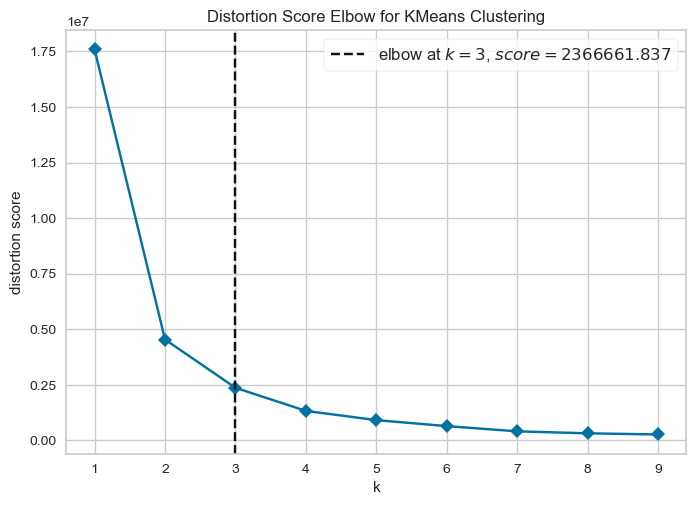

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(samples)        # Fit the data to the visualizer
visualizer.show()

# Model

In [114]:
model2 = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [115]:
wine_Final['Cluster_Made'] = model2.fit_predict(samples)
wine_Final.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_Made
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [116]:
model2.cluster_centers_

array([[1.29298387e+01, 2.49842742e+00, 2.40578629e+00, 1.98903226e+01,
        1.02911290e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.49887097e+00, 5.59516129e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.69797872e+01,
        1.05436170e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.48398551e+00, 2.29112319e+00, 2.08094203e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.44347826e+00, 4.08507245e+00, 9.39945652e-01, 2.49072464e+00,
        4.58231884e+02]])

In [117]:
wine_Final.Cluster_Made.value_counts(ascending=False)

2    69
0    62
1    47
Name: Cluster_Made, dtype: int64

# b.Using Silhouette Chart

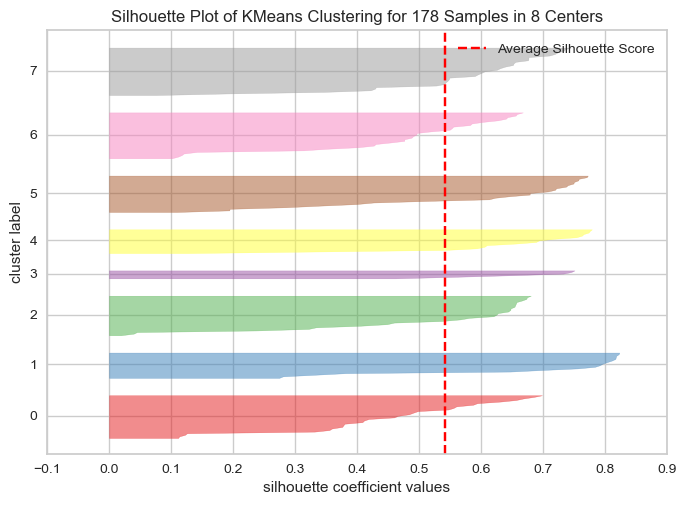

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [118]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
km = KMeans(random_state=24)
visualizer = SilhouetteVisualizer(km,timimngs=False)
visualizer.fit(samples)        # Fit the data to the visualizer
visualizer.show()

In [130]:
model_Elbow = KMeans(n_clusters=3,max_iter=100,random_state=42)
model_Silhhouette = KMeans(n_clusters=5,max_iter=100,random_state=42)

In [131]:
wine_Final['Cluster_Made_Elbow'] = model_Elbow.fit_predict(samples)
wine_Final['Cluster_Made_Silhotte'] = model_Silhhouette.fit_predict(samples)
wine_Final.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_Made,Cluster_Made_Elbow,Cluster_Made_Silhotte
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1,4
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1,4
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1,4
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0,2


In [124]:
model_Elbow.cluster_centers_

array([[1.29298387e+01, 2.49842742e+00, 2.40578629e+00, 1.98903226e+01,
        1.02911290e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.49887097e+00, 5.59516129e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.69797872e+01,
        1.05436170e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.48398551e+00, 2.29112319e+00, 2.08094203e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.44347826e+00, 4.08507245e+00, 9.39945652e-01, 2.49072464e+00,
        4.58231884e+02]])

In [132]:
model_Silhhouette.cluster_centers_

array([[1.39205000e+01, 1.76900000e+00, 2.49750000e+00, 1.72000000e+01,
        1.06650000e+02, 2.90800000e+00, 3.08150000e+00, 2.95500000e-01,
        1.90850000e+00, 6.32250000e+00, 1.11700000e+00, 3.00850000e+00,
        1.36085000e+03],
       [1.27416667e+01, 2.68354167e+00, 2.36416667e+00, 2.06125000e+01,
        9.68020833e+01, 1.96687500e+00, 1.32833333e+00, 4.12916667e-01,
        1.37354167e+00, 5.47062500e+00, 8.64583333e-01, 2.18875000e+00,
        6.36125000e+02],
       [1.31776923e+01, 2.52509615e+00, 2.44725962e+00, 1.93961538e+01,
        1.10692308e+02, 2.28192308e+00, 1.88884615e+00, 3.58846154e-01,
        1.65000000e+00, 5.42461538e+00, 9.03692308e-01, 2.63192308e+00,
        8.23576923e+02],
       [1.24750877e+01, 2.31289474e+00, 2.28311404e+00, 2.06201754e+01,
        9.17192982e+01, 2.10578947e+00, 1.87140351e+00, 3.83333333e-01,
        1.46842105e+00, 3.94982454e+00, 9.59057018e-01, 2.54438596e+00,
        4.35578947e+02],
       [1.37185185e+01, 1.96814815e+

In [133]:
print(" By ELBOW METHOD :\n",wine_Final.Cluster_Made_Elbow.value_counts(ascending=False))
print(" By Silhotte METHOD :\n",wine_Final.Cluster_Made_Silhotte.value_counts(ascending=False))

 By ELBOW METHOD :
 2    69
0    62
1    47
Name: Cluster_Made_Elbow, dtype: int64
 By Silhotte METHOD :
 3    57
1    48
4    27
2    26
0    20
Name: Cluster_Made_Silhotte, dtype: int64


In [129]:
Submission = wine.loc[:,['Customer_Segment',"Cluster_Made_Elbow","Cluster_Made_Silhotte"]]
Submission

KeyError: "None of [Index(['Customer_Segment', 'Cluster_Made_Elbow', 'Cluster_Made_Silhotte'], dtype='object')] are in the [columns]"